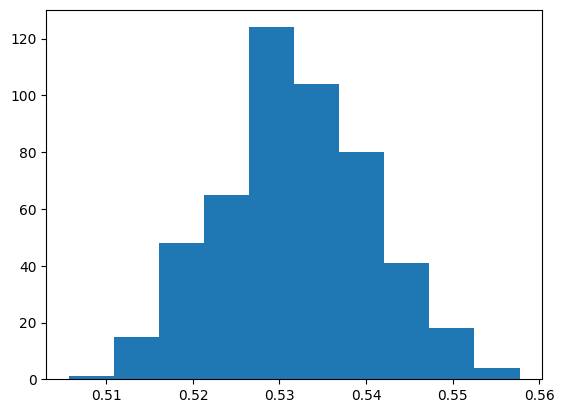

Accuracy: 0.5366197183098591


In [144]:
import pandas as pd
df_model = pd.read_parquet("citizen_model_2.5.parquet")
accuracies = []
for i in range(500):
    true = 0
    for idx,(answer,model) in enumerate(zip(df_model["answer"], df_model[f"model_answer_{i}"])):
        #if model not in ["A", "B", "C"]:
            #display(df_model.iloc[idx])
            #print(f"Model {i} failed on {idx} with {model}")
        if answer.lower() == model.lower():
            true += 1
    #print(f"Accuracy: {true/len(df_model)} for model {i}")
    accuracies.append(true/len(df_model))

# Plot accuracies histogram
import matplotlib.pyplot as plt
plt.hist(accuracies)
plt.show()

print(f"Accuracy: {true/len(df_model)}")

In [140]:
df_2 = pd.read_parquet("citizen_model_2.5.parquet")
accuracy_2 = []
df_3 = pd.read_parquet("citizen_model_3.0.parquet")
accuracy_3 = []
df_4 = pd.read_parquet("citizen_model_4.0.parquet")
accuracy_4 = []
df_5 = pd.read_parquet("citizen_model_5.0.parquet")
accuracy_5 = []
df_6 = pd.read_parquet("citizen_model_6.0.parquet")
accuracy_6 = []
df_16 = pd.read_parquet("citizen_model_16.0.parquet")
accuracy_16 = []

for df,accuracy_list in zip([df_2, df_3, df_4, df_5, df_6, df_16], [accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_16]):
    for i in range(500):
        true = 0
        for idx,(answer,model) in enumerate(zip(df["answer"], df[f"model_answer_{i}"])):
            if answer.lower() == model.lower():
                true += 1
        accuracy_list.append(true/len(df))

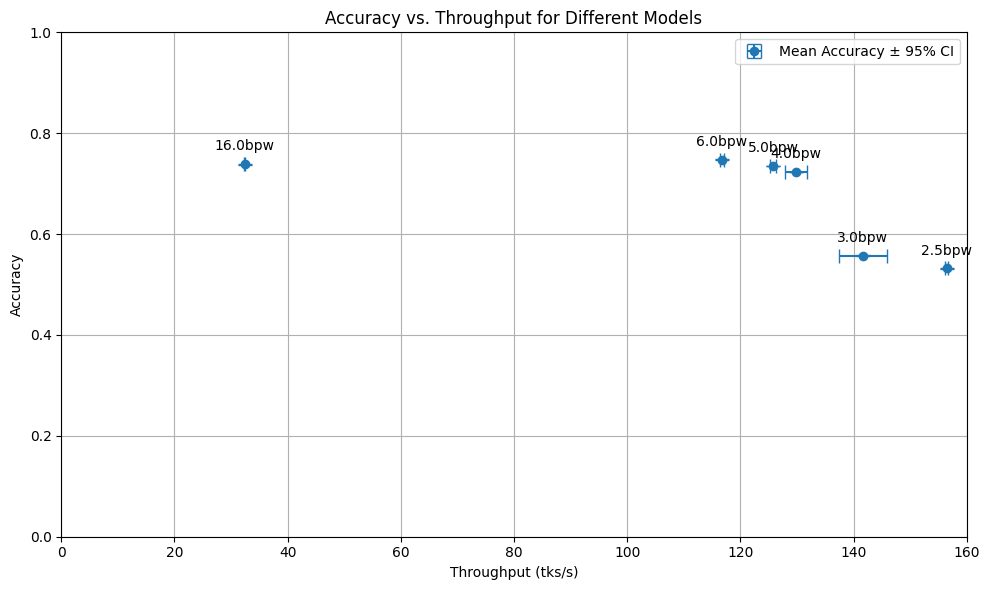

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load speed data
df_speed = pd.read_parquet("speed.parquet")

# Assuming df_speed has columns like "speed_2.5bpw", "speed_3.0bpw", etc.
data = [df_speed[f"speed_{label}"] for label in ['2.5bpw', '3.0bpw', '4.0bpw', '5.0bpw', '6.0bpw', '16.0bpw']]

# Calculate means and standard errors for throughput
means = [np.mean(d) for d in data]
std_errs_throughput = [1.96 * np.std(d) / np.sqrt(len(d)) for d in data]  # 1.96 is the z-value for 95% CI

# Load accuracy data for each model
accuracy_data = [accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_16]
accuracy_means = [np.mean(accuracy) for accuracy in accuracy_data]
accuracy_std_errs = [1.96 * np.std(accuracy) / np.sqrt(len(accuracy)) for accuracy in accuracy_data]

models = ['2.5bpw', '3.0bpw', '4.0bpw', '5.0bpw', '6.0bpw', "16.0bpw"]

# Plotting
plt.figure(figsize=(10, 6))

plt.errorbar(means, accuracy_means, xerr=std_errs_throughput, yerr=accuracy_std_errs, fmt='o', capsize=5, label='Mean Accuracy ± 95% CI')

# Annotate each point with model label
for model, mean_acc in zip(models, accuracy_means):
    plt.annotate(model, (means[models.index(model)], mean_acc), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlim(0,160)
plt.ylim(0,1)
plt.xlabel('Throughput (tks/s)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Throughput for Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_vs_throughput_with_CI.png')  # Save the figure if needed
plt.show()

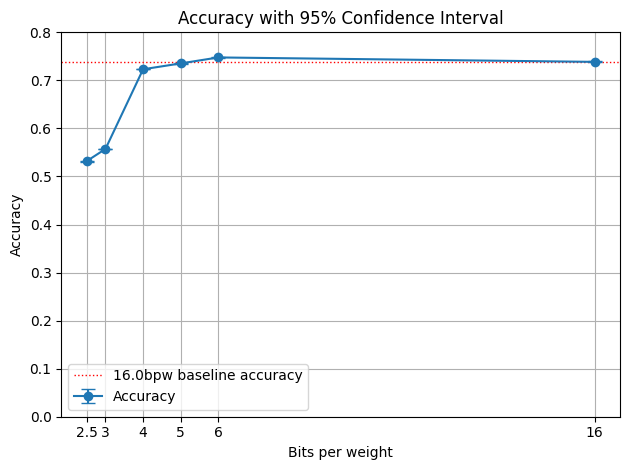

In [152]:
import numpy as np
data = [accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_16]

# Calculate means and standard errors
means = [np.mean(d) for d in data]
std_errs = [1.96 * np.std(d) / np.sqrt(len(d)) for d in data]  # 1.96 is the z-value for 95% CI

# Plotting
fig, ax = plt.subplots()

# Add a dotted horizontal line at the mean accuracy for 16.0
mean_accuracy_16 = np.mean(accuracy_16)
ax.axhline(y=mean_accuracy_16, color='r', linestyle='dotted', linewidth=1, label="16.0bpw baseline accuracy")

# Define the x positions and labels
x_positions = [2.5, 3, 4, 5, 6, 16]
x_labels = ['2.5', '3', '4', '5', '6', '16']

# Plot the data as dots with lines connecting them
ax.errorbar(x_positions, means, yerr=std_errs, fmt='-o', capsize=5, label='Accuracy')

# Adjust x-axis tick positions and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set y-axis limits
ax.set_ylim(0, 0.8)

# Add labels, title, and legend
ax.set_xlabel('Bits per weight')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy with 95% Confidence Interval')
ax.legend()

ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

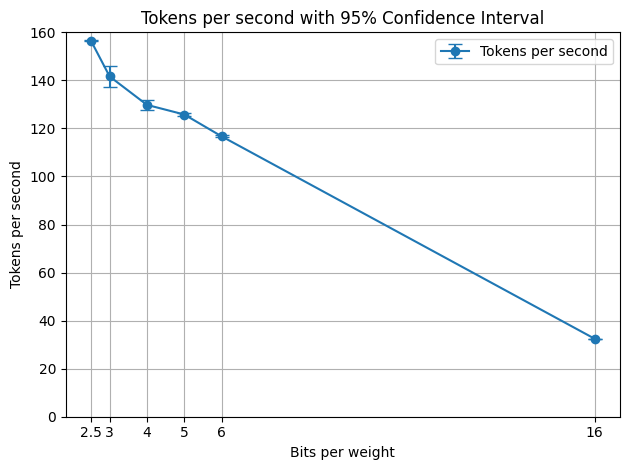

In [135]:
import numpy as np

df_speed = pd.read_parquet("speed.parquet")
data = [df_speed["speed_2.5bpw"], df_speed["speed_3.0bpw"], df_speed["speed_4.0bpw"], df_speed["speed_5.0bpw"], df_speed["speed_6.0bpw"], df_speed["speed_16.0bpw"]]

# Calculate means and standard errors
means = [np.mean(d) for d in data]
std_errs = [1.96 * np.std(d) / np.sqrt(len(d)) for d in data]  # 1.96 is the z-value for 95% CI

# Plotting
fig, ax = plt.subplots()

# Define the x positions and labels
x_positions = [2.5, 3, 4, 5, 6,16]
x_labels = ['2.5', '3', '4', '5', '6', '16']

# Plot the data as dots with lines connecting them
ax.errorbar(x_positions, means, yerr=std_errs, fmt='-o', capsize=5, label='Tokens per second')

# Adjust x-axis tick positions and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set y-axis limits
ax.set_ylim(0, 160)

# Add labels, title, and legend
ax.set_xlabel('Bits per weight')
ax.set_ylabel('Tokens per second')
ax.set_title('Tokens per second with 95% Confidence Interval')
ax.legend()

ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

question            Hvem kan uafhængigt af andre udskrive folketin...
option_a                                         Folketingets formand
option_b                                              Statsministeren
option_c                                                         None
answer                                                              B
                                          ...                        
model_answer_495                                                    A
model_answer_496                                                    B
model_answer_497                                                    A
model_answer_498                                                    A
model_answer_499                                                    B
Name: 17, Length: 509, dtype: object

Accuracy: 0.7309859154929578 for model 0
Accuracy: 0.7380281690140845 for model 1
Accuracy: 0.7492957746478873 for model 2
Accuracy: 0.7352112676056338 for model 3
Accuracy: 0.7394366197183099 for model 4
Accuracy: 0.7225352112676057 for model 5
Accuracy: 0.7338028169014085 for model 6
Accuracy: 0.7323943661971831 for model 7
Accuracy: 0.7394366197183099 for model 8
Accuracy: 0.7267605633802817 for model 9
Accuracy: 0.7436619718309859 for model 10
Accuracy: 0.7338028169014085 for model 11
Accuracy: 0.7295774647887324 for model 12
Accuracy: 0.7422535211267606 for model 13
Accuracy: 0.7267605633802817 for model 14
Accuracy: 0.7549295774647887 for model 15
Accuracy: 0.747887323943662 for model 16
Accuracy: 0.7338028169014085 for model 17
Accuracy: 0.7422535211267606 for model 18
Accuracy: 0.723943661971831 for model 19
Accuracy: 0.7366197183098592 for model 20
Accuracy: 0.7366197183098592 for model 21
Accuracy: 0.7352112676056338 for model 22
Accuracy: 0.7380281690140845 for model 23
Accu

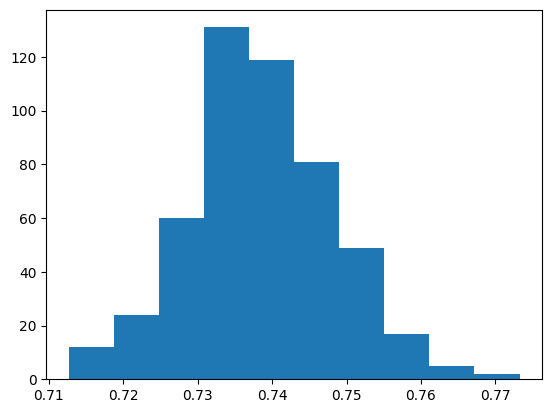

Accuracy: 0.7436619718309859


In [139]:
import pandas as pd
df_model = pd.read_parquet("citizen_model_16.0.parquet")
display(df_model.loc[17])
accuracies = []
for i in range(500):
    true = 0
    for idx,(answer,model) in enumerate(zip(df_model["answer"], df_model[f"model_answer_{i}"])):
        #if model not in ["A", "B", "C"]:
            #display(df_model.iloc[idx])
            #print(f"Model {i} failed on {idx} with {model}")
        if answer.lower() == model.lower():
            true += 1
    print(f"Accuracy: {true/len(df_model)} for model {i}")
    accuracies.append(true/len(df_model))

# Plot accuracies histogram
import matplotlib.pyplot as plt
plt.hist(accuracies)
plt.show()

print(f"Accuracy: {true/len(df_model)}")

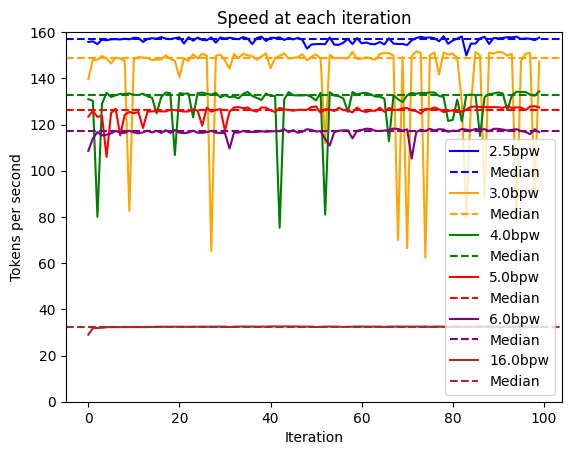

In [137]:
import pandas as pd

import matplotlib.pyplot as plt

df_speed = pd.read_parquet("speed.parquet")
bpw = ["2.5","3.0","4.0","5.0","6.0", "16.0"]
colors = ["blue", "orange", "green", "red", "purple", "brown"]

for weight,color in zip(bpw,colors):
    median = df_speed[f"speed_{weight}bpw"].median()
    ax = df_speed[f"speed_{weight}bpw"].plot(color = color, label=f"{weight}bpw")
    ax.axhline(median, color=color, linestyle='--', label='Median')
    plt.legend()
plt.xlabel("Iteration")
plt.title("Speed at each iteration")
plt.ylim(0, 160)
plt.ylabel("Tokens per second")
plt.show()